In [1]:
import sys, os
sys.path.insert(1, '/Users/arcticfox/Documents/GitHub/stella/')

import stella
import batman
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from astropy.table import Table
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from lightkurve.lightcurve import LightCurve as LC
from sklearn.metrics import average_precision_score

In [2]:
from matplotlib.colors import LinearSegmentedColormap
from pylab import *

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula = LinearSegmentedColormap.from_list('parula', cm_data)

parula_colors = []
cmap = cm.get_cmap(parula, 2)
for i in range(cmap.N):
    rgb = cmap(i)[:3]
    parula_colors.append(matplotlib.colors.rgb2hex(rgb))
parula_colors = np.array(parula_colors)

In [3]:
COLOR = 'white'

plt.rcParams['font.size'] = 20
plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'

In [7]:
metrics = stella.ModelMetrics(fn_dir='/Users/arcticfox/Documents/GitHub/stella/run01')

In [94]:
metrics.calculate_ensemble_metrics(data_set='test')

In [97]:
metrics.ensemble_curve

array([[1.        , 0.99612403, 0.99612403, ..., 0.59108527, 0.58333333,
        0.        ],
       [0.27906977, 0.28731135, 0.2974537 , ..., 1.        , 1.        ,
        1.        ]])

In [70]:
keyword = 'accuracy'
inds, val_inds = [], []
for i, name in enumerate(metrics.history_table.colnames):
    if keyword in name and 'val' not in name:
        inds.append(name)
    if keyword in name and 'val' in name:
        val_inds.append(name)
        
accuracy = np.zeros((len(inds), len(metrics.history_table)))
val_acc  = np.zeros((len(val_inds), len(metrics.history_table)))

for i, name in enumerate(inds):
    accuracy[i] = metrics.history_table[name]        
    
for i, name in enumerate(val_inds):
    val_acc[i] = metrics.history_table[name]        

In [71]:
keyword = 'loss'
inds, val_inds = [], []
for i, name in enumerate(metrics.history_table.colnames):
    if keyword in name and 'val' not in name:
        inds.append(name)
    if keyword in name and 'val' in name:
        val_inds.append(name)
        
loss = np.zeros((len(inds), len(metrics.history_table)))
val_loss  = np.zeros((len(val_inds), len(metrics.history_table)))

for i, name in enumerate(inds):
    loss[i] = metrics.history_table[name]   
for i, name in enumerate(val_inds):
    val_loss[i] = metrics.history_table[name] 

In [105]:
keyword1 = 'recall'
keyword2 = 'precision'
inds1, inds2 = [], []
for i, name in enumerate(metrics.history_table.colnames):
    if keyword1 in name and 'val' in name:
        inds1.append(name)
    if keyword2 in name and 'val' in name:
        inds2.append(name)
        
recall = np.zeros((len(inds), len(metrics.history_table)))
precision  = np.zeros((len(val_inds), len(metrics.history_table)))

for i in range(len(inds1)):
    r = metrics.history_table[inds1[i]]   
    p = metrics.history_table[inds2[i]] 
    recall[i], precision[i] = zip(*sorted(zip(r, p)))

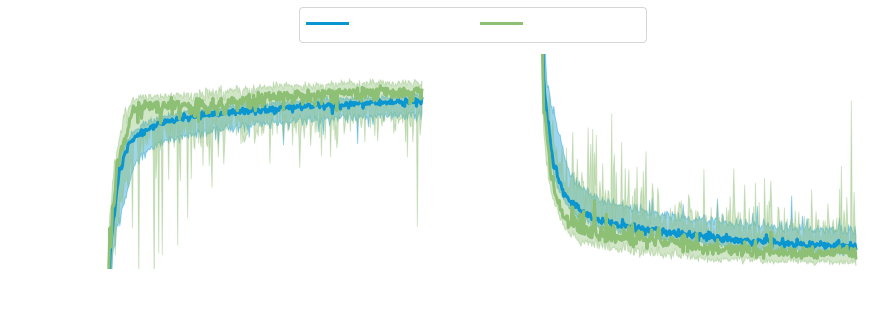

In [109]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4))
ax1.plot(np.arange(0,len(metrics.history_table)),
         np.nanmedian(accuracy, axis=0), color=parula_colors[80],
         linewidth=3)
ax1.fill_between(np.arange(0,len(metrics.history_table),1),
                 np.nanpercentile(accuracy, 5, axis=0),
                 np.nanpercentile(accuracy, 95, axis=0),
                 alpha=0.4, color=parula_colors[80])
ax1.plot(np.arange(0,len(metrics.history_table)),
         np.nanmedian(val_acc, axis=0), color=parula_colors[160],
         linewidth=3)
ax1.fill_between(np.arange(0,len(metrics.history_table),1),
                 np.nanpercentile(val_acc, 5, axis=0),
                 np.nanpercentile(val_acc, 95, axis=0),
                 alpha=0.4, color=parula_colors[160])
ax1.set_ylim(0.9,1.005)
ax1.set_yticks([0.9,0.95,1.0])


ax2.plot(np.arange(0,len(metrics.history_table)),
         np.nanmedian(loss, axis=0), color=parula_colors[80],
         linewidth=3, label='Accuracy')
ax2.fill_between(np.arange(0,len(metrics.history_table),1),
                 np.nanpercentile(loss, 5, axis=0),
                 np.nanpercentile(loss, 95, axis=0),
                 alpha=0.4, color=parula_colors[80])
ax2.plot(np.arange(0,len(metrics.history_table)),
         np.nanmedian(val_loss, axis=0), color=parula_colors[160],
         linewidth=3, label='Validation')
ax2.fill_between(np.arange(0,len(metrics.history_table),1),
                 np.nanpercentile(val_loss, 5, axis=0),
                 np.nanpercentile(val_loss, 95, axis=0),
                 alpha=0.4, color=parula_colors[160])
ax2.legend(bbox_to_anchor=(-0.65, 1.08, 1., .102), loc='center left',
           ncol=2, mode="expand", borderaxespad=0.)

ax2.set_ylim(0.03, 0.3)
ax2.set_yticks([0.03,0.17,0.3])
ax1.set_xlabel('Epochs')
ax2.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')
plt.subplots_adjust(wspace=0.25)

plt.savefig('/Users/arcticfox/Documents/youngStars/presentationFigures/loss_acc.png',
            rasterize=True, bbox_inches='tight', dpi=250, transparent=True)

In [113]:
ds = stella.FlareDataSet(fn_dir='/Users/arcticfox/Documents/flares/lc/unlabeled',
                         catalog='/Users/arcticfox/Documents/flares/catalog_per_flare_final.csv')

Reading in training set files.


100%|██████████| 865/865 [00:01<00:00, 439.11it/s]


5389 positive classes (flare)
17684 negative classes (no flare)
30.0% class imbalance



In [134]:
def confusion_matrix(metrics, ds, threshold=0.5, colors='inferno', 
                     data_set='validation'):
    """
    Plots the confusion matrix of true positives,
    true negatives, false positives, and false
    negatives.
    Parameters
    ----------
    ds : stella.DataSet
         Object needed to look at light curves from the validation
         or the test set.
    threshold : float, optional
         Defines the threshold for positive vs. negative cases.
         Default is 0.5 (50%).
    colormap : str, optional
         Colormap to draw colors from to plot the light curves
         on the confusion matrix. Default is 'inferno'.
     data_set : str, optional
         Sets which data set to look at. Default is 'validation'.
         Other option is 'test'. DO NOT LOOK AT THE TEST SET UNTIL
         YOU ARE COMPLETELY HAPPY WITH YOUR MODEL. 
    """

    # PLOTTING NORMALIZED LIGHT CURVE TO GIVEN SUBPLOT
    def plot_lc(data, ind, ax, color, offset):
        """ Plots the light curve on a given axis. """
        ax.set_xlim(0,200)
        ax.set_ylim(-3,3.5)
        ax.axvline(100, linestyle='dotted', color='gray',
                   linewidth=0.5)
        ax.set_yticks([])
        ax.set_xticks([])

        # NORMALIZING FLUX TO PEAK
        lc = data[ind] - np.nanmedian(data[ind])
        lc /= np.abs(np.nanmax(lc, axis=0))
        lc += offset

        ax.plot(lc, color=color, linewidth=2.5)
        return ax

    # GETS THE TABLE & VALIDATION DATA FOR THE MATRIX
    if data_set == 'validation':
        df = metrics.predval_table
        x_val = ds.val_data
    elif data_set == 'test':
        df = metrics.predtest_table
        x_val = ds.test_data

    try:
        df['round_pred']
    except:
        df = metrics.pred_round(df, threshold)

    # INDICES FOR THE CONFUSION MATRIX
    ind_tn = np.where( (df['round_pred'] == 0) & (df['gt'] == 0) )[0]
    ind_fn = np.where( (df['round_pred'] == 0) & (df['gt'] == 1) )[0]
    ind_tp = np.where( (df['round_pred'] == 1) & (df['gt'] == 1) )[0]
    ind_fp = np.where( (df['round_pred'] == 1) & (df['gt'] == 0) )[0]

    order = [ind_tn, ind_fp, ind_fn, ind_tp]
    titles = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
    shifts = [-2, 0, 2]

    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,8))

    i = 0
    np.random.seed(123)
    for ax in axes.reshape(-1):
        inds = order[i]
        which = np.random.randint(0,len(inds),3)

        for j in range(3):
            ax = plot_lc(x_val, inds[which[j]], ax, colors[j],
                         shifts[j])

        ax.set_title(titles[i], fontsize=20)

       # if titles[i] == 'False Positives' or titles[i] == 'False Negatives':
       #     ax.set_facecolor('lightgray')

        i += 1

    return fig

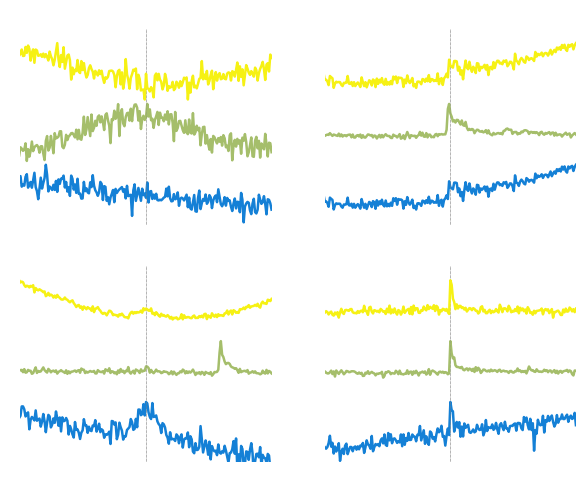

In [135]:
fig = confusion_matrix(metrics, ds=ds, 
                       colors=[parula_colors[60], parula_colors[170], parula_colors[250]])
fig.savefig('/Users/arcticfox/Documents/youngStars/presentationFigures/confusion.png',
            rasterize=True, bbox_inches='tight', dpi=250, transparent=True)

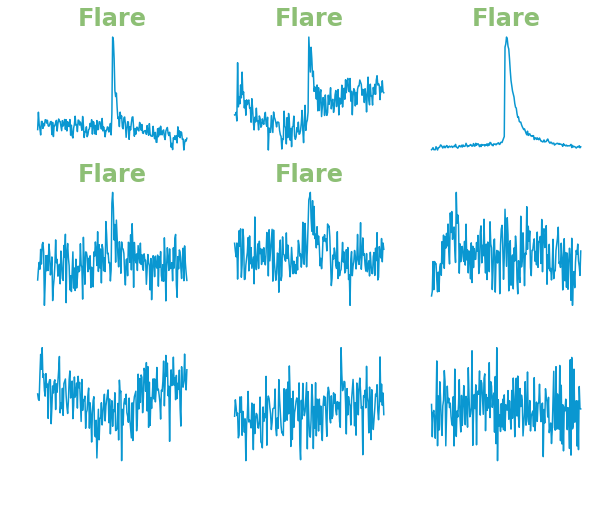

In [263]:
def examples(ds, data_type='training',color=80,text_ind=-1, text=True):
    if data_type=='training':
        labels = ds.train_labels
        data = ds.train_data
    elif data_type=='test':
        labels = ds.test_labels
        data = ds.test_data

    fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(10,8),
                             sharex=True)
    i = 0
    np.random.seed(456)
    for ax in axes.reshape(-1):
        if i < 5:
            pos = np.where(labels==1)[0]
            pos = pos[np.random.randint(0,len(pos),1)]
            ax.plot(np.arange(0,ds.cadences,1),
                    data[pos][0,:,0], c=parula_colors[color])
            
            if text == True:
                ax.set_title('Flare', c=parula_colors[text_ind], fontweight='bold')

            if data_type=='test':
                ax.set_ylim(np.nanmin(data[pos][0,:,0]),
                            np.nanmax(data[pos][0,:,0])+0.01)
        else:
            neg = np.where(labels==0)[0]
            neg = neg[np.random.randint(0,len(neg),1)]
            ax.plot(np.arange(0,ds.cadences,1),
                    data[neg][0,:,0], c=parula_colors[color])
            
            if text == True:
                ax.set_title('No Flare')
            
        ax.set_yticks([])
        ax.set_yticklabels([])
        
        if i == 3:
            ax.set_ylabel('Flux')
        if i == 7:
            ax.set_xlabel('Cadences')
            
        i += 1

    plt.subplots_adjust(hspace=0.25)
    return fig


fig = examples(ds, data_type='training', color=80, text_ind=160, text=True)
fig.savefig('/Users/arcticfox/Documents/youngStars/presentationFigures/learning.png',
            rasterize=True, bbox_inches='tight', dpi=250, transparent=True)

## Light curves

In [5]:
data_dir = '/Users/arcticfox/Documents/flares/youngstar_pred/'

table = Table.read(os.path.join(data_dir, 'og_fts_table.txt'), 
                   format='ascii')
table = table[table['Tmag'] < 16]

In [6]:

data = np.load(os.path.join(data_dir, 'pred_light_curves.npy'), allow_pickle=True)
TIME = data[0]#[0:200]
FLUX = data[1]#[0:200]
ERR = data[2]#[0:200]

QUAL = np.load(os.path.join(data_dir, 'qual.npy'), allow_pickle=True)

CATALOG = Table.read(os.path.join(data_dir, 'total_table.txt'),
                    format='ascii')

PREDS = np.load(os.path.join(data_dir, 'average_predictions.npy'),
                allow_pickle=True)
TICS = np.load(os.path.join(data_dir, 'tics.npy'), allow_pickle=True)

W0629 22:30:48.576767 4746192320 logger.py:204] OverflowError converting to FloatType in column YA_prob, possibly resulting in degraded precision.


In [7]:
QTIME, QFLUX, QERR, QPRED = [], [] , [], []

for i in tqdm_notebook(range(len(TICS))):
#    init_per = fts.LS_results['period_days'].data[i]
    mask = QUAL[i]+0.0#np.zeros(len(FLUX[i]))

    diff_time = np.diff(TIME[i])
    orbit = np.where(diff_time >= np.nanmedian(diff_time)+12*np.nanstd(diff_time))
    orbit = orbit[0][0]
    
   # real_high = np.where(FLUX[i] > 2.0)[0]
    
    mask[0:500] = 1
    mask[orbit:orbit+800]=1
    mask[len(FLUX[i])-50:] = 1
    
  #  mask[real_high] = 1

    q = (mask == 0)
    
   # if np.nanstd(FLUX[i][q]) > 0.1:
   #     mask[orbit:orbit+500] = 1
        
   # q = ((mask == 0) | (mask == 512))

    lk = LC(time=TIME[i][q], flux=FLUX[i][q], 
            flux_err=ERR[i][q])
    
    QTIME.append(lk.time)
    QFLUX.append(lk.flux)
    QERR.append(np.ones(len(lk.flux)))
    QPRED.append(PREDS[i][q])
    
QTIME = np.array(QTIME)
QFLUX = np.array(QFLUX)
QERR = np.array(QERR)
QPRED = np.array(QPRED)

TICS = np.array([int(i) for i in TICS])

In [8]:
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

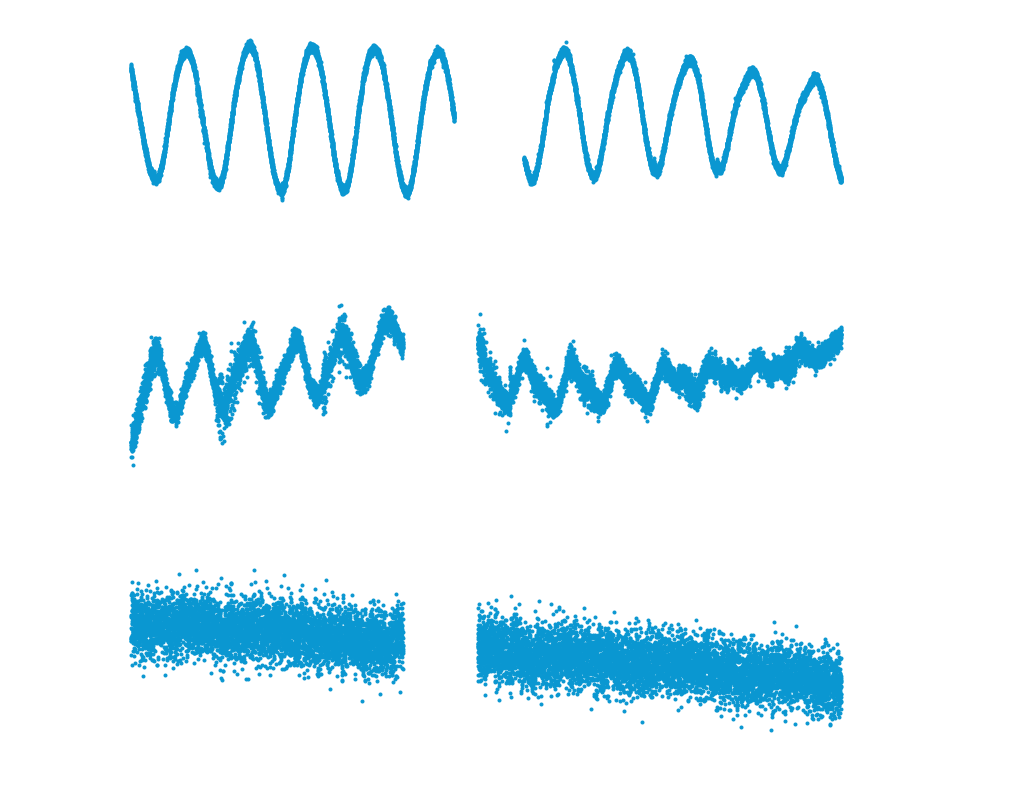

In [301]:
plotted = [7491381, 7444999, 4291395]

fig, axes = plt.subplots(ncols=1, nrows=3,
                         figsize=(14,13))
i = 0
for ax in axes.reshape(-1):
    where = np.where(TICS==plotted[i])[0]
    if i < 2:
        where = where[1]
    else:
        where = where[0]
        
    ax.plot(QTIME[where], QFLUX[where], '.', c=parula_colors[80])
    
    age = int(table[table['Target_ID']==TICS[where]]['YMG_age'].data[0])
    grp = table[table['Target_ID']==TICS[where]]['Best_YA'].data[0]
    
    ax.text(np.nanmax(QTIME[where])+2., np.nanmedian(QFLUX[where]), 
            '{0} Myr\n{1}'.format(age, grp), fontsize=24)
    
    ax.set_title('TIC {}'.format(TICS[where]))
    
    if i == 1:
        ax.set_ylabel('Normalized Flux', fontsize=24)
    i += 1
    
ax.set_xlabel('Time [BJD - 2457000]', fontsize=24)
plt.subplots_adjust(hspace=0.5)
fig.savefig('/Users/arcticfox/Documents/youngStars/presentationFigures/spot_evolution.png',
            rasterize=True, bbox_inches='tight', dpi=250, transparent=True)

## Injected flares

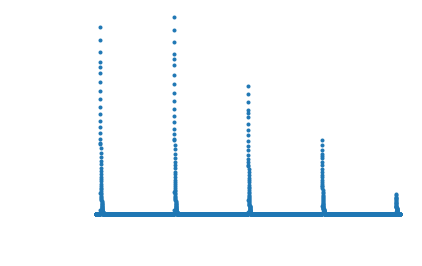

In [403]:
time = np.linspace(0, 5, 7200)

#np.random.seed(1235)
t0s = np.linspace(100, len(time)-100,5,dtype=int)
amps = np.random.uniform(0.005, 0.02, 5)
y = np.zeros(len(time))

for i in range(len(t0s)):
    model, _ = stella.utils.flare_lightcurve(time=time,
                                             t0=t0s[i],
                                             amp=amps[i],
                                             rise=0.001,
                                             fall=0.01,
                                             y=y)
    y += model
#y += 1
plt.plot(time, y, '.')

In [413]:
noise = np.random.normal(0,0.001,len(time))

In [421]:
median = np.nanmedian(y+noise)
sigma = np.nanstd(y+noise)
N1, N2, N3 = 3, 1, 3

flux = y + noise

T0 = flux - median # excursion should be positive #"N0"
T1 = np.abs(flux - median) / sigma #N1
T2 = np.abs(flux - median + noise) / sigma #N2

where = np.where((T0 > 0) & (T1 > N1) & (T2 > N2))[0]

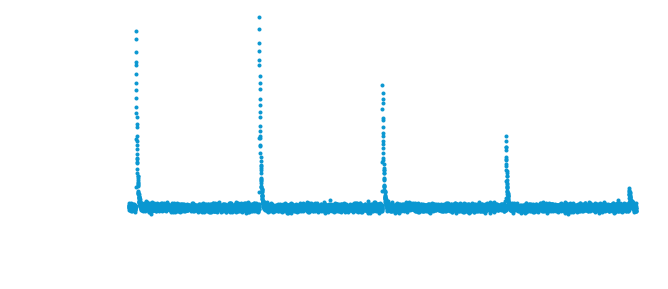

In [427]:
plt.figure(figsize=(10,4))
plt.plot(time, y+noise, '.', c=parula_colors[80])
#plt.plot(time[where], flux[where], '.', c=parula_colors[-1])
plt.xlabel('Time [Days]')
plt.ylabel('Normalized Flux')

plt.savefig('/Users/arcticfox/Documents/youngStars/presentationFigures/fake_lc.png',
            rasterize=True, bbox_inches='tight', dpi=250, transparent=True)

In [455]:
def batman_model(t, rp):
    params = batman.TransitParams()
    params.t0 = 0.                       #time of inferior conjunction
    params.per = 1.                      #orbital period
    params.rp = rp                      #planet radius (in units of stellar radii)
    params.a = 5.                       #semi-major axis (in units of stellar radii)
    params.inc = 87.                     #orbital inclination (in degrees)
    params.ecc = 0.                      #eccentricity
    params.w = 90.                       #longitude of periastron (in degrees)
    params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
    params.limb_dark = "quadratic"       #limb darkening model
    
    m = batman.TransitModel(params, t)    #initializes model
    flux = m.light_curve(params)          #calculates light curve
    return flux

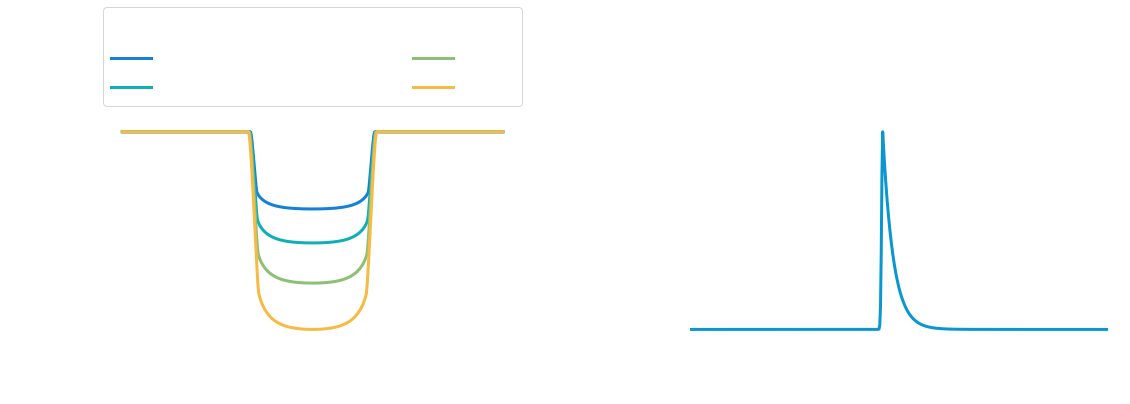

In [481]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,4))
ax2.plot(time[(time>1.1) & (time<1.5)], 
         y[(time>1.1) & (time<1.5)]+1,  
         c=parula_colors[80], linewidth=3)
ax2.set_xlim(1.1, 1.5)

ttime = np.linspace(-0.1,0.1,len(time[(time>1.1) & (time<1.5)]))
radii = np.arange(0.05, 0.09, 0.01)
for i,r in enumerate(radii):
    tmodel = batman_model(ttime, r)
    ax1.plot(time[(time>1.1) & (time<1.5)],
             tmodel, linewidth=3, c=parula_colors[(i*50)+60],
            label=np.round(r,2))
ax1.legend(bbox_to_anchor=(0, 1.25, 1., .102), loc='center left',
           ncol=2, mode="expand", borderaxespad=0., title='$R_p/R_*$')

ax1.set_ylabel('Normalized Flux')
ax1.set_xlabel('Time [Days]')
ax2.set_xlabel('Time [Days]')
ax2.set_yticks([1, 1.03, 1.06, 1.09])

plt.subplots_adjust(wspace=0.4)

plt.savefig('/Users/arcticfox/Documents/youngStars/presentationFigures/transits.png',
            rasterize=True, bbox_inches='tight', dpi=250, transparent=True)

## Animation

In [183]:
import imageio
from IPython.display import HTML
from matplotlib import animation
from matplotlib.patches import Rectangle

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['figure.facecolor'] = 'k'

In [212]:
output = '/Users/arcticfox/Desktop/frames/'
where = np.where(TICS==671393)[0][0]
q = ((QTIME[where] >= 1456.999)  & (QTIME[where]<1457.65))


fig, (ax2, ax1) = plt.subplots(ncols=1, nrows=2, figsize=(14,8), sharex=True)

frames = []

for i in range(len(QTIME[where][q])):

    im1, = ax1.plot(QTIME[where][q][:i], QPRED[where][q][:i],
             linewidth=3, c=parula_colors[-1])

    

    im2 = ax2.scatter(QTIME[where][q], QFLUX[where][q], s=30, c='w')
    im3 = ax2.scatter(QTIME[where][q][:i], QFLUX[where][q][:i], c=QPRED[where][q][:i],
                     vmin=0, vmax=1, s=25, cmap=parula)
    
    ax1.set_xlabel('Time [BJD - 2457000]', fontsize=24)
    ax2.set_ylabel('Normalized Flux', fontsize=24)
    ax1.set_ylabel('Probability')
    ax1.set_ylim(0,1.005)

    #patches = []
    #patches
    #patch = Rectangle(xy=(QTIME[where][q][i]-0.15, 1-0.03),
    #                  height=0.06, width=0.3, linewidth=3,
    #                  edgecolor='r', facecolor='none')
    
    #patches.append(ax2.add_patch(patch))
    
    ax2.set_xlim(np.nanmin(QTIME[where][q]), np.nanmax(QTIME[where][q]))
    ax2.set_xticks([1457.0, 1457.2, 1457.4, 1457.6])
    ax2.set_xticklabels(labels=['1457.0', '1457.2', '1457.4', '1457.6'])

    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.89, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(im3, cax=cbar_ax)
    cbar.set_label('Probability', fontsize=24)
    
    fig.patch.set_facecolor('k')
    ax1.set_facecolor('k')
    ax2.set_facecolor('k')

    #plt.subplots_adjust()
    frames.append(np.array([im1, im2, im3]))
   # plt.savefig(os.path.join(output, 'frame{0:03d}.png'.format(i)),
   #             facecolor='k', bbox_inches='tight', dpi=200,
   #             rasterize=True)
plt.close()

ani = animation.ArtistAnimation(fig, frames,
                                interval=105, blit=True,
                                repeat=True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [213]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Adina Feinstein'), bitrate=1800)
ani.save('/Users/arcticfox/Desktop/frames/boxslider.mp4', writer=writer,
         savefig_kwargs={'facecolor':'black'})